<a href="https://colab.research.google.com/github/MarthaTo/pasantialt/blob/main/PasantiaLanasTrinidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <center><b>PASANTÍA EN LANAS TRINIDAD</b></center>
## <center><b>Universidad Tecnológica de Uruguay - UTEC - ITR CS</b></center>
## <center>Martha Toscano</center>
### <center>2024</center>

In [ ]:
# Se importan funciones auxiliares desde GitHub requeridas para el desarrollo
import sys
sys.path.append('/content/weather_data_uy_preprocessing')

In [ ]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Datos cuando la empresa se encuentra abierta trabajando EA
# Subir csv desde la pc, seleccionas a todos los csv a la vez
from google.colab import files
uploaded = files.upload()

Saving EA0211-0312.csv to EA0211-0312.csv
Saving EA0412-0912.csv to EA0412-0912.csv
Saving EA0808-0809.csv to EA0808-0809.csv
Saving EA1012-1001.csv to EA1012-1001.csv
Saving EC0909-0910.csv to EC0909-0910.csv
Saving EC1010_0111.csv to EC1010_0111.csv


In [ ]:
# Llamar a los csv EA empresa abierta
csv1 = pd.read_csv('EA0808-0809.csv', sep=",")
csv2 = pd.read_csv('EA0211-0312.csv', sep=",")
csv3 = pd.read_csv('EA0412-0912.csv', sep=",")
csv4 = pd.read_csv('EA1012-1001.csv', sep=",")

In [ ]:
# Llamar a los csv EC empresa cerrada
csv5 = pd.read_csv('EC0909-0910.csv', sep=",")
csv6 = pd.read_csv('EC1010_0111.csv', sep=",")

In [ ]:
#Unir los csv de datos EA empresa abierta
datosEA = pd.concat([csv1, csv2, csv3, csv4], axis=0)


In [ ]:
#Unir los csv de datos EA empresa abierta Emilia
datosEAEmilia = pd.concat([csv1], axis=0)

In [ ]:
#Unir los csv de datos EA empresa abierta Martha
datosEAMartha = pd.concat([csv2, csv3, csv4], axis=0)


In [ ]:
#Unir los csv de datos EC empresa cerrada
datosEC = pd.concat([csv5, csv6], axis=0)


In [ ]:
datosEA.isna().mean() * 100
#porcentaje de los nan superior al 50% no se recomienda trabajar ese periodo

Fecha        0.000000
Hora         0.000000
CO          54.571759
H2S-CH4S    68.630174
COV-NM      53.602941
NO2         68.629493
O3-NO2      53.596133
O3          68.629493
PM1         23.805828
PM2.5       23.805828
PM10        23.805828
dtype: float64

In [ ]:
datosEC.isna().mean() * 100

Fecha        0.000000
Hora         0.000000
CO          12.457562
H2S-CH4S    37.073045
COV-NM      12.500000
NO2         29.579475
O3-NO2      18.613683
O3          37.340535
PM1         19.843107
PM2.5       19.843107
PM10        19.843107
dtype: float64

In [ ]:
# Convertir las columnas 'fecha' y 'hora' en objetos datetime EA
datosEA['Fecha_nueva'] = pd.to_datetime(datosEA['Fecha'] + ' ' + datosEA['Hora'])
# datosEA = datosEA.drop(1, axis=1)


In [ ]:
# Convertir las columnas 'fecha' y 'hora' en objetos datetime EAEmilia
datosEAEmilia['Fecha_nueva'] = pd.to_datetime(datosEAEmilia['Fecha'] + ' ' + datosEAEmilia['Hora'])
# datosEA = datosEA.drop(1, axis=1)


In [ ]:
# Convertir las columnas 'fecha' y 'hora' en objetos datetime EAMartha
datosEAMartha['Fecha_nueva'] = pd.to_datetime(datosEAMartha['Fecha'] + ' ' + datosEAMartha['Hora'])
# datosEA = datosEA.drop(1, axis=1)


In [ ]:
# Convertir las columnas 'fecha' y 'hora' en objetos datetime EC
datosEC['Fecha_nueva'] = pd.to_datetime(datosEC['Fecha'] + ' ' + datosEC['Hora'])


In [ ]:
# Darle formato fecha (donde dice 'Fecha' se pone el nombre como está en tu set de datos la fecha y donde dice datos pone el nombre de set de datos)
# datosEA['Fecha_nueva']=pd.to_datetime(datosEA['Fecha'], format="%Y/%m/%d %H:%M:%S").dt.date
# datosEA


# ESTO NO HACE FALTA PORQUE YA SE TIENE EL FORMATO EN LA MANERA ADECUADA!!!!

In [ ]:
# Darle formato fecha
# datosEC['Fecha']=pd.to_datetime(datosEC['Fecha'], format="%Y/%m/%d %H:%M:%S").dt.date
# datosEC


# ESTO NO HACE FALTA PORQUE YA SE TIENE EL FORMATO EN LA MANERA ADECUADA!!!!

In [ ]:
# indexar fecha EA
datosEA= datosEA.set_index('Fecha_nueva')

In [ ]:
# indexar fecha EAEmilia
datosEAEmilia= datosEAEmilia.set_index('Fecha_nueva')

In [ ]:
# indexar fecha EAMartha
datosEAMartha= datosEAMartha.set_index('Fecha_nueva')

In [ ]:
# indexar fecha EC
datosEC= datosEC.set_index('Fecha_nueva')

In [ ]:
datosEA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 146880 entries, 2023-08-08 00:01:00 to 2024-01-11 00:00:00
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Fecha     146880 non-null  object 
 1   Hora      146880 non-null  object 
 2   CO        66725 non-null   float64
 3   H2S-CH4S  46076 non-null   float64
 4   COV-NM    68148 non-null   float64
 5   NO2       46077 non-null   float64
 6   O3-NO2    68158 non-null   float64
 7   O3        46077 non-null   float64
 8   PM1       111914 non-null  float64
 9   PM2.5     111914 non-null  float64
 10  PM10      111914 non-null  float64
dtypes: float64(9), object(2)
memory usage: 13.4+ MB


In [ ]:
datosEC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77760 entries, 2023-09-09 00:01:00 to 2023-11-02 00:00:00
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fecha     77760 non-null  object 
 1   Hora      77760 non-null  object 
 2   CO        68073 non-null  float64
 3   H2S-CH4S  48932 non-null  float64
 4   COV-NM    68040 non-null  float64
 5   NO2       54759 non-null  float64
 6   O3-NO2    63286 non-null  float64
 7   O3        48724 non-null  float64
 8   PM1       62330 non-null  float64
 9   PM2.5     62330 non-null  float64
 10  PM10      62330 non-null  float64
dtypes: float64(9), object(2)
memory usage: 7.1+ MB


In [ ]:
#se deben borrar las columnas anteriores de la fecha y la hora
datosEA = datosEA.drop(['Fecha', 'Hora'], axis=1)


In [ ]:
#se deben borrar las columnas anteriores de la fecha y la hora
datosEAEmilia = datosEAEmilia.drop(['Fecha', 'Hora'], axis=1)


In [ ]:
#se deben borrar las columnas anteriores de la fecha y la hora
datosEAMartha = datosEAMartha.drop(['Fecha', 'Hora'], axis=1)


In [ ]:
datosEA_hora = datosEA.resample('H').mean()
#datosEA_hora

In [ ]:
datosEAEmilia_hora = datosEAEmilia.resample('H').mean()
#datosEAEmilia_hora

In [ ]:
datosEAMartha_hora = datosEAMartha.resample('H').mean()
#datosEAMartha_hora

In [ ]:
#se deben borrar las columnas anteriores de la fecha y la hora
datosEC = datosEC.drop(['Fecha', 'Hora'], axis=1)
#datosEC

In [ ]:
datosEC_hora = datosEC.resample('H').mean()
#datosEC_hora

In [ ]:

estadisticasEA = datosEA_hora.describe()
#estadisticasEA

In [ ]:

estadisticasEC = datosEC_hora.describe()
#estadisticasEC

In [ ]:
# Calcular la correlación entre los DataFrames
correlacion = datosEC_hora.corrwith(datosEA_hora)
correlacion

CO          1.0
H2S-CH4S    NaN
COV-NM      NaN
NO2         NaN
O3-NO2     -1.0
O3          NaN
PM1         1.0
PM2.5       1.0
PM10        1.0
dtype: float64

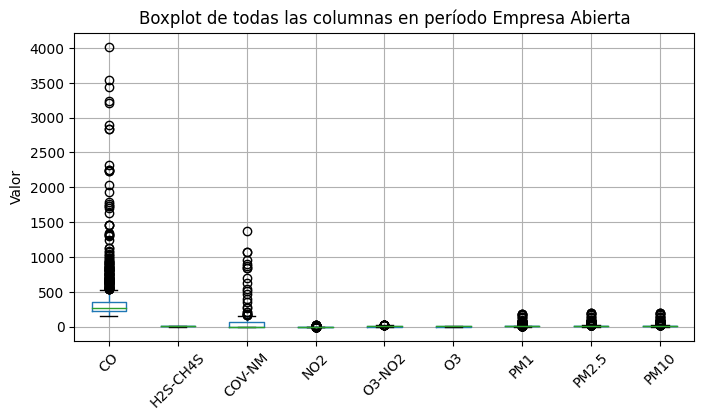

In [ ]:
# Crear el boxplot para todas las columnas de estadísticas EA
plt.figure(figsize=(8, 4))
datosEA_hora.boxplot()
plt.title('Boxplot de todas las columnas en período Empresa Abierta')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

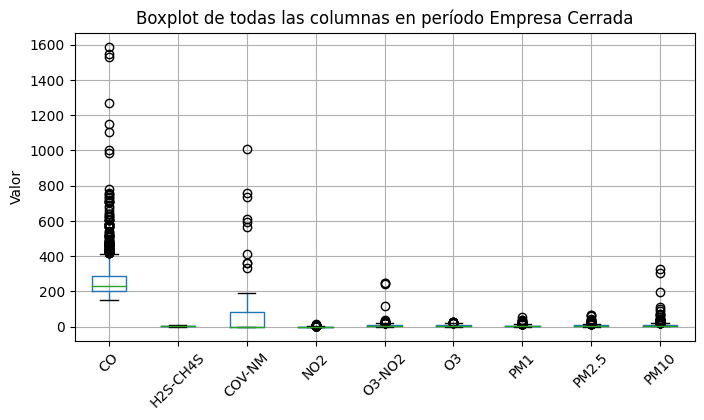

In [ ]:
# Crear el boxplot para todas las columnas de estadísticas EC
plt.figure(figsize=(8, 4))
datosEC_hora.boxplot()
plt.title('Boxplot de todas las columnas en período Empresa Cerrada')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

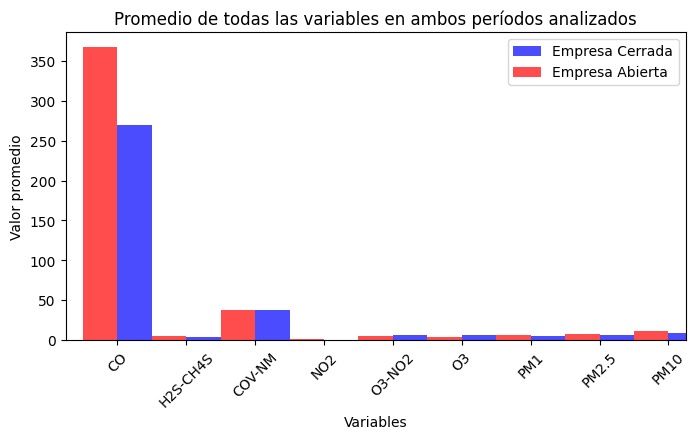

In [ ]:
# Seleccionar la fila 'mean' de cada DataFrame
mean_ec = estadisticasEC.loc['mean']
mean_ea = estadisticasEA.loc['mean']

# Crear el gráfico de barras para 'estadisticasEC'
plt.figure(figsize=(8, 4))
mean_ec.plot(kind='bar', color='blue', alpha=0.7, label='Empresa Cerrada', position=0)

# Crear el gráfico de barras para 'estadisticasEA'
mean_ea.plot(kind='bar', color='red', alpha=0.7, label='Empresa Abierta', position=1)

# Agregar título y etiquetas
plt.title('Promedio de todas las variables en ambos períodos analizados')
plt.xlabel('Variables')
plt.ylabel('Valor promedio')
plt.legend()
plt.xticks(rotation=45)
plt.show()

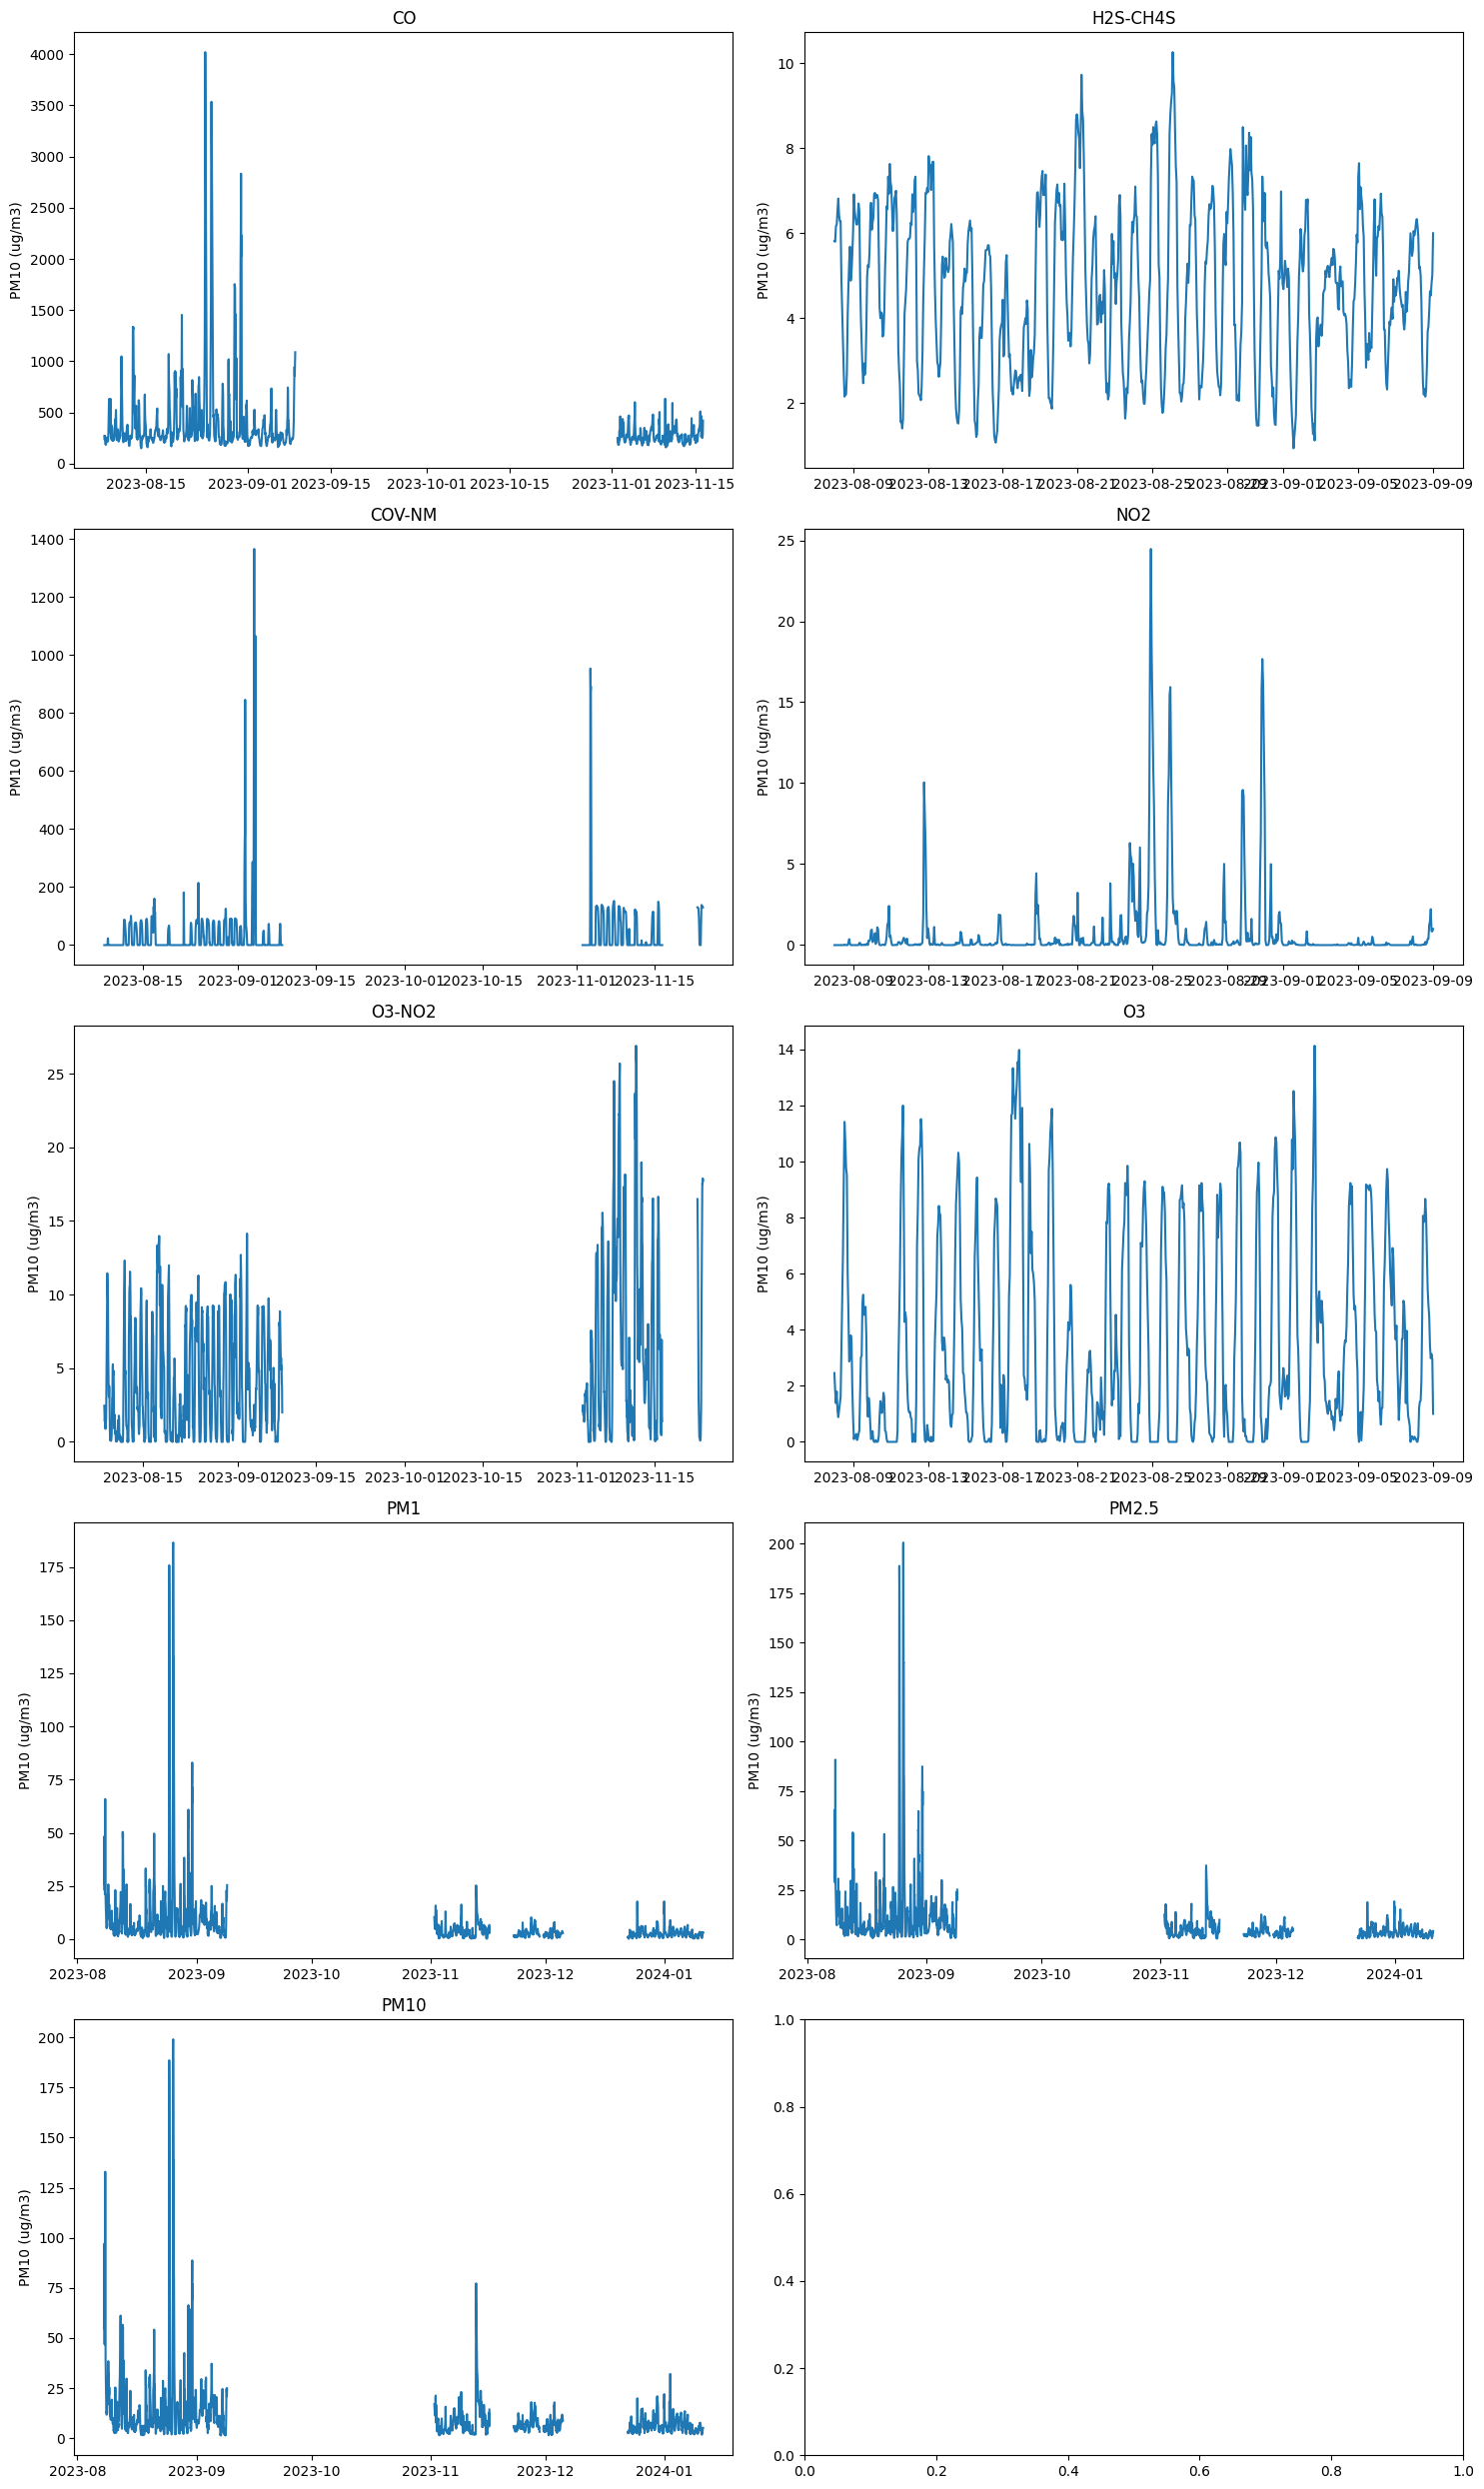

In [ ]:
# Obtener el número de columnas en el DataFrame
num_columns = len(datosEA_hora.columns)

# Calcular el número de filas y columnas para los subgráficos
num_rows = num_columns // 2
if num_columns % 2 != 0:
    num_rows += 1

# Crear los subgráficos
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Iterar sobre cada columna y crear un subgráfico para cada una
for i, column in enumerate(datosEA_hora.columns):
    row = i // 2
    col = i % 2
    axs[row, col].plot(datosEA_hora.index, datosEA_hora[column])
    axs[row, col].set_title(column)
    axs[row, col].set_ylabel('PM10 (ug/m3)')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()
plt.show()

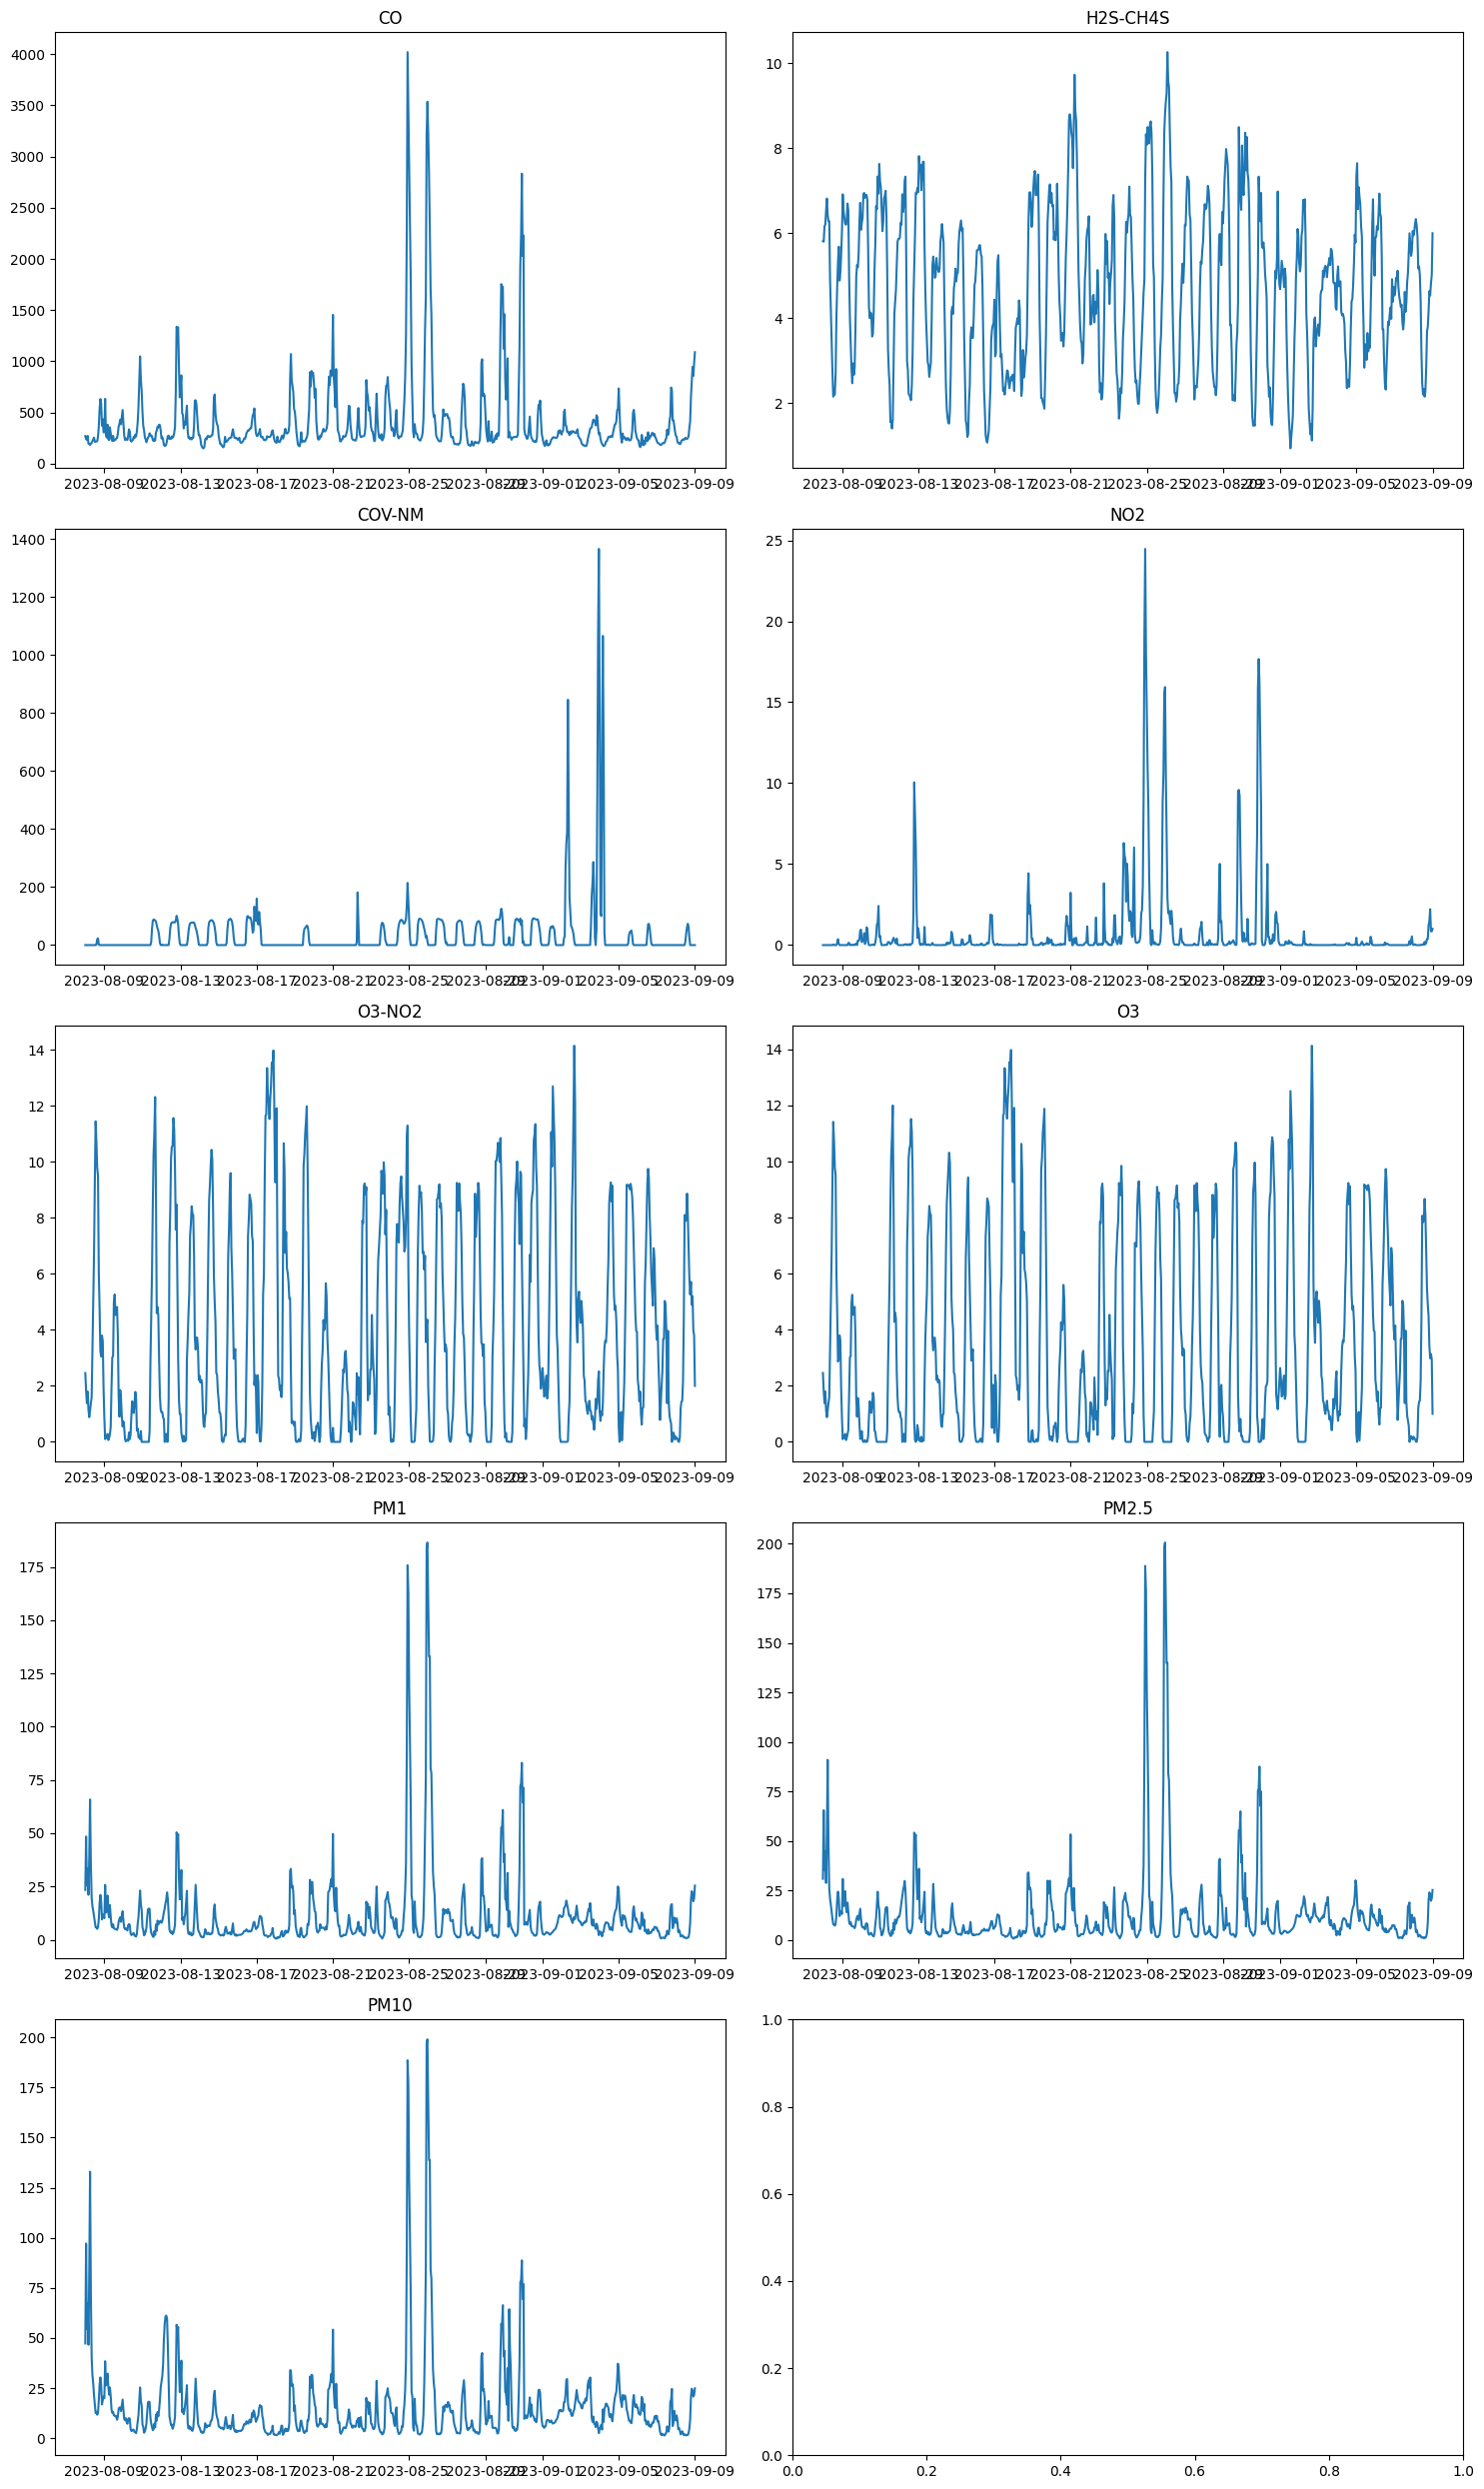

In [ ]:
# Obtener el número de columnas en el DataFrame Abierto Emilia
num_columns = len(datosEAEmilia_hora.columns)

# Calcular el número de filas y columnas para los subgráficos
num_rows = num_columns // 2
if num_columns % 2 != 0:
    num_rows += 1

# Crear los subgráficos
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Iterar sobre cada columna y crear un subgráfico para cada una
for i, column in enumerate(datosEAEmilia_hora.columns):
    row = i // 2
    col = i % 2
    axs[row, col].plot(datosEAEmilia_hora.index, datosEAEmilia_hora[column])
    axs[row, col].set_title(column)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()
plt.show()

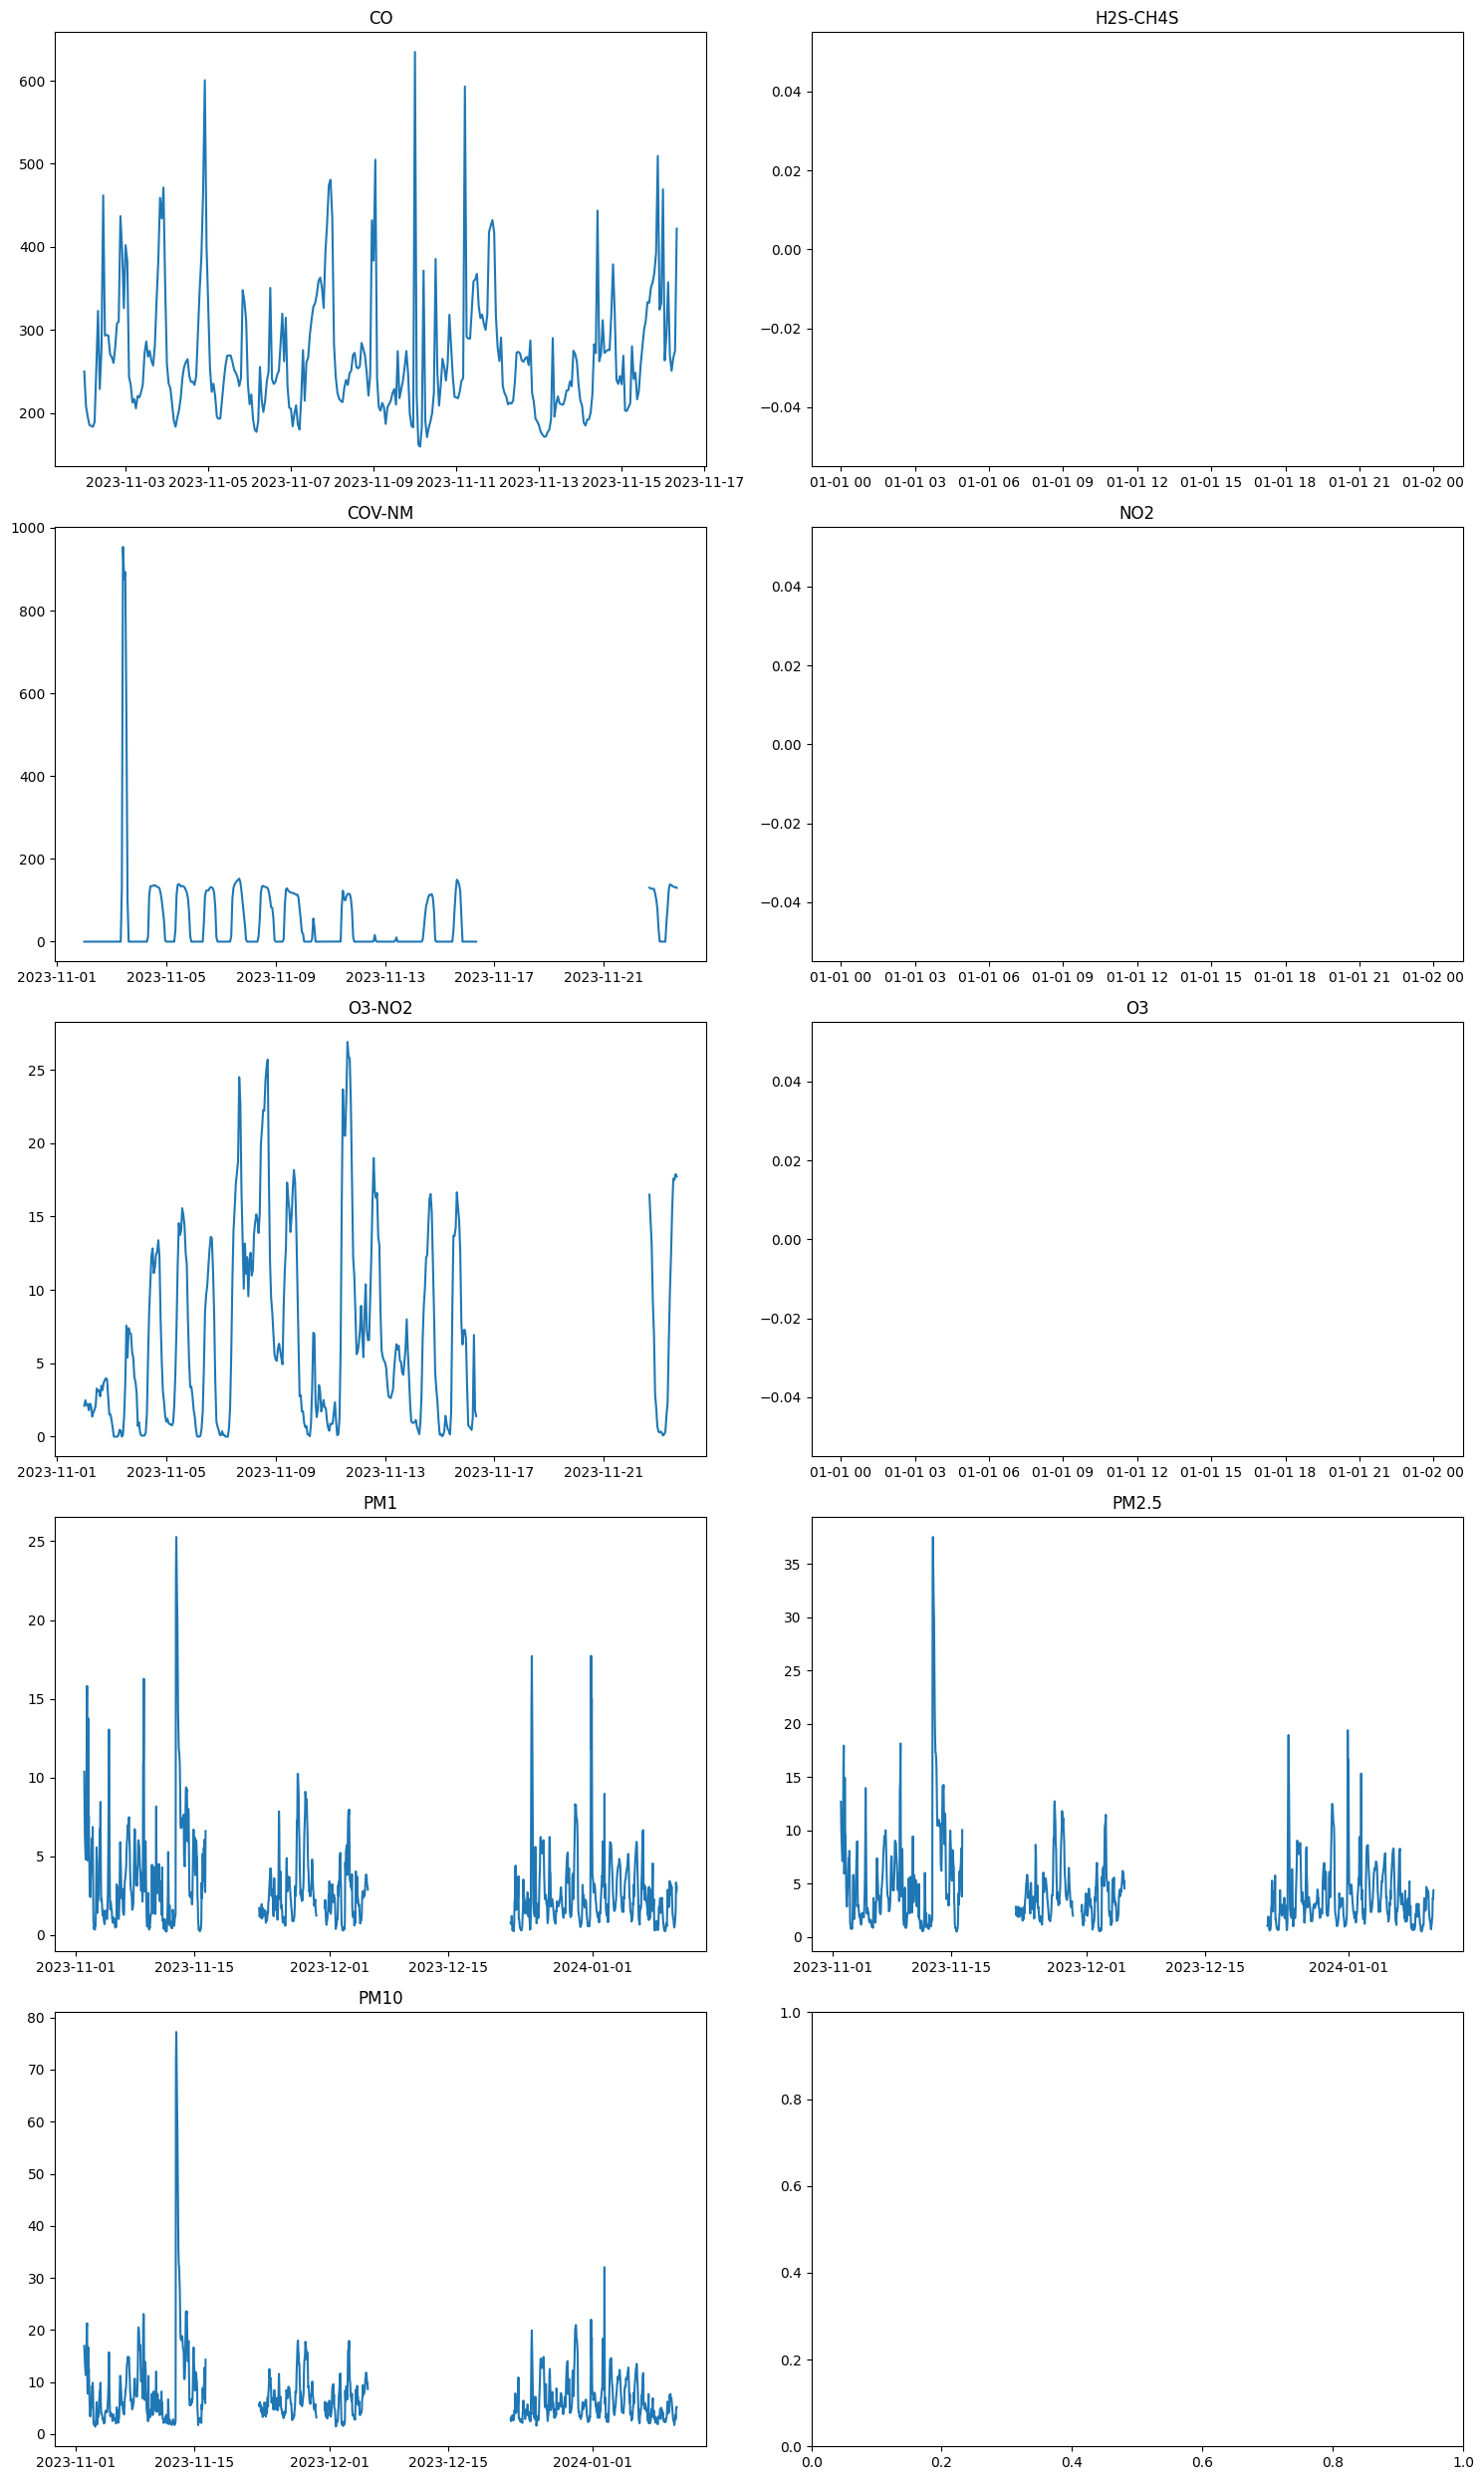

In [ ]:
# Obtener el número de columnas en el DataFrame Abierto Martha
num_columns = len(datosEAMartha_hora.columns)

# Calcular el número de filas y columnas para los subgráficos
num_rows = num_columns // 2
if num_columns % 2 != 0:
    num_rows += 1

# Crear los subgráficos
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Iterar sobre cada columna y crear un subgráfico para cada una
for i, column in enumerate(datosEAMartha_hora.columns):
    row = i // 2
    col = i % 2
    axs[row, col].plot(datosEAMartha_hora.index, datosEAMartha_hora[column])
    axs[row, col].set_title(column)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()
plt.show()

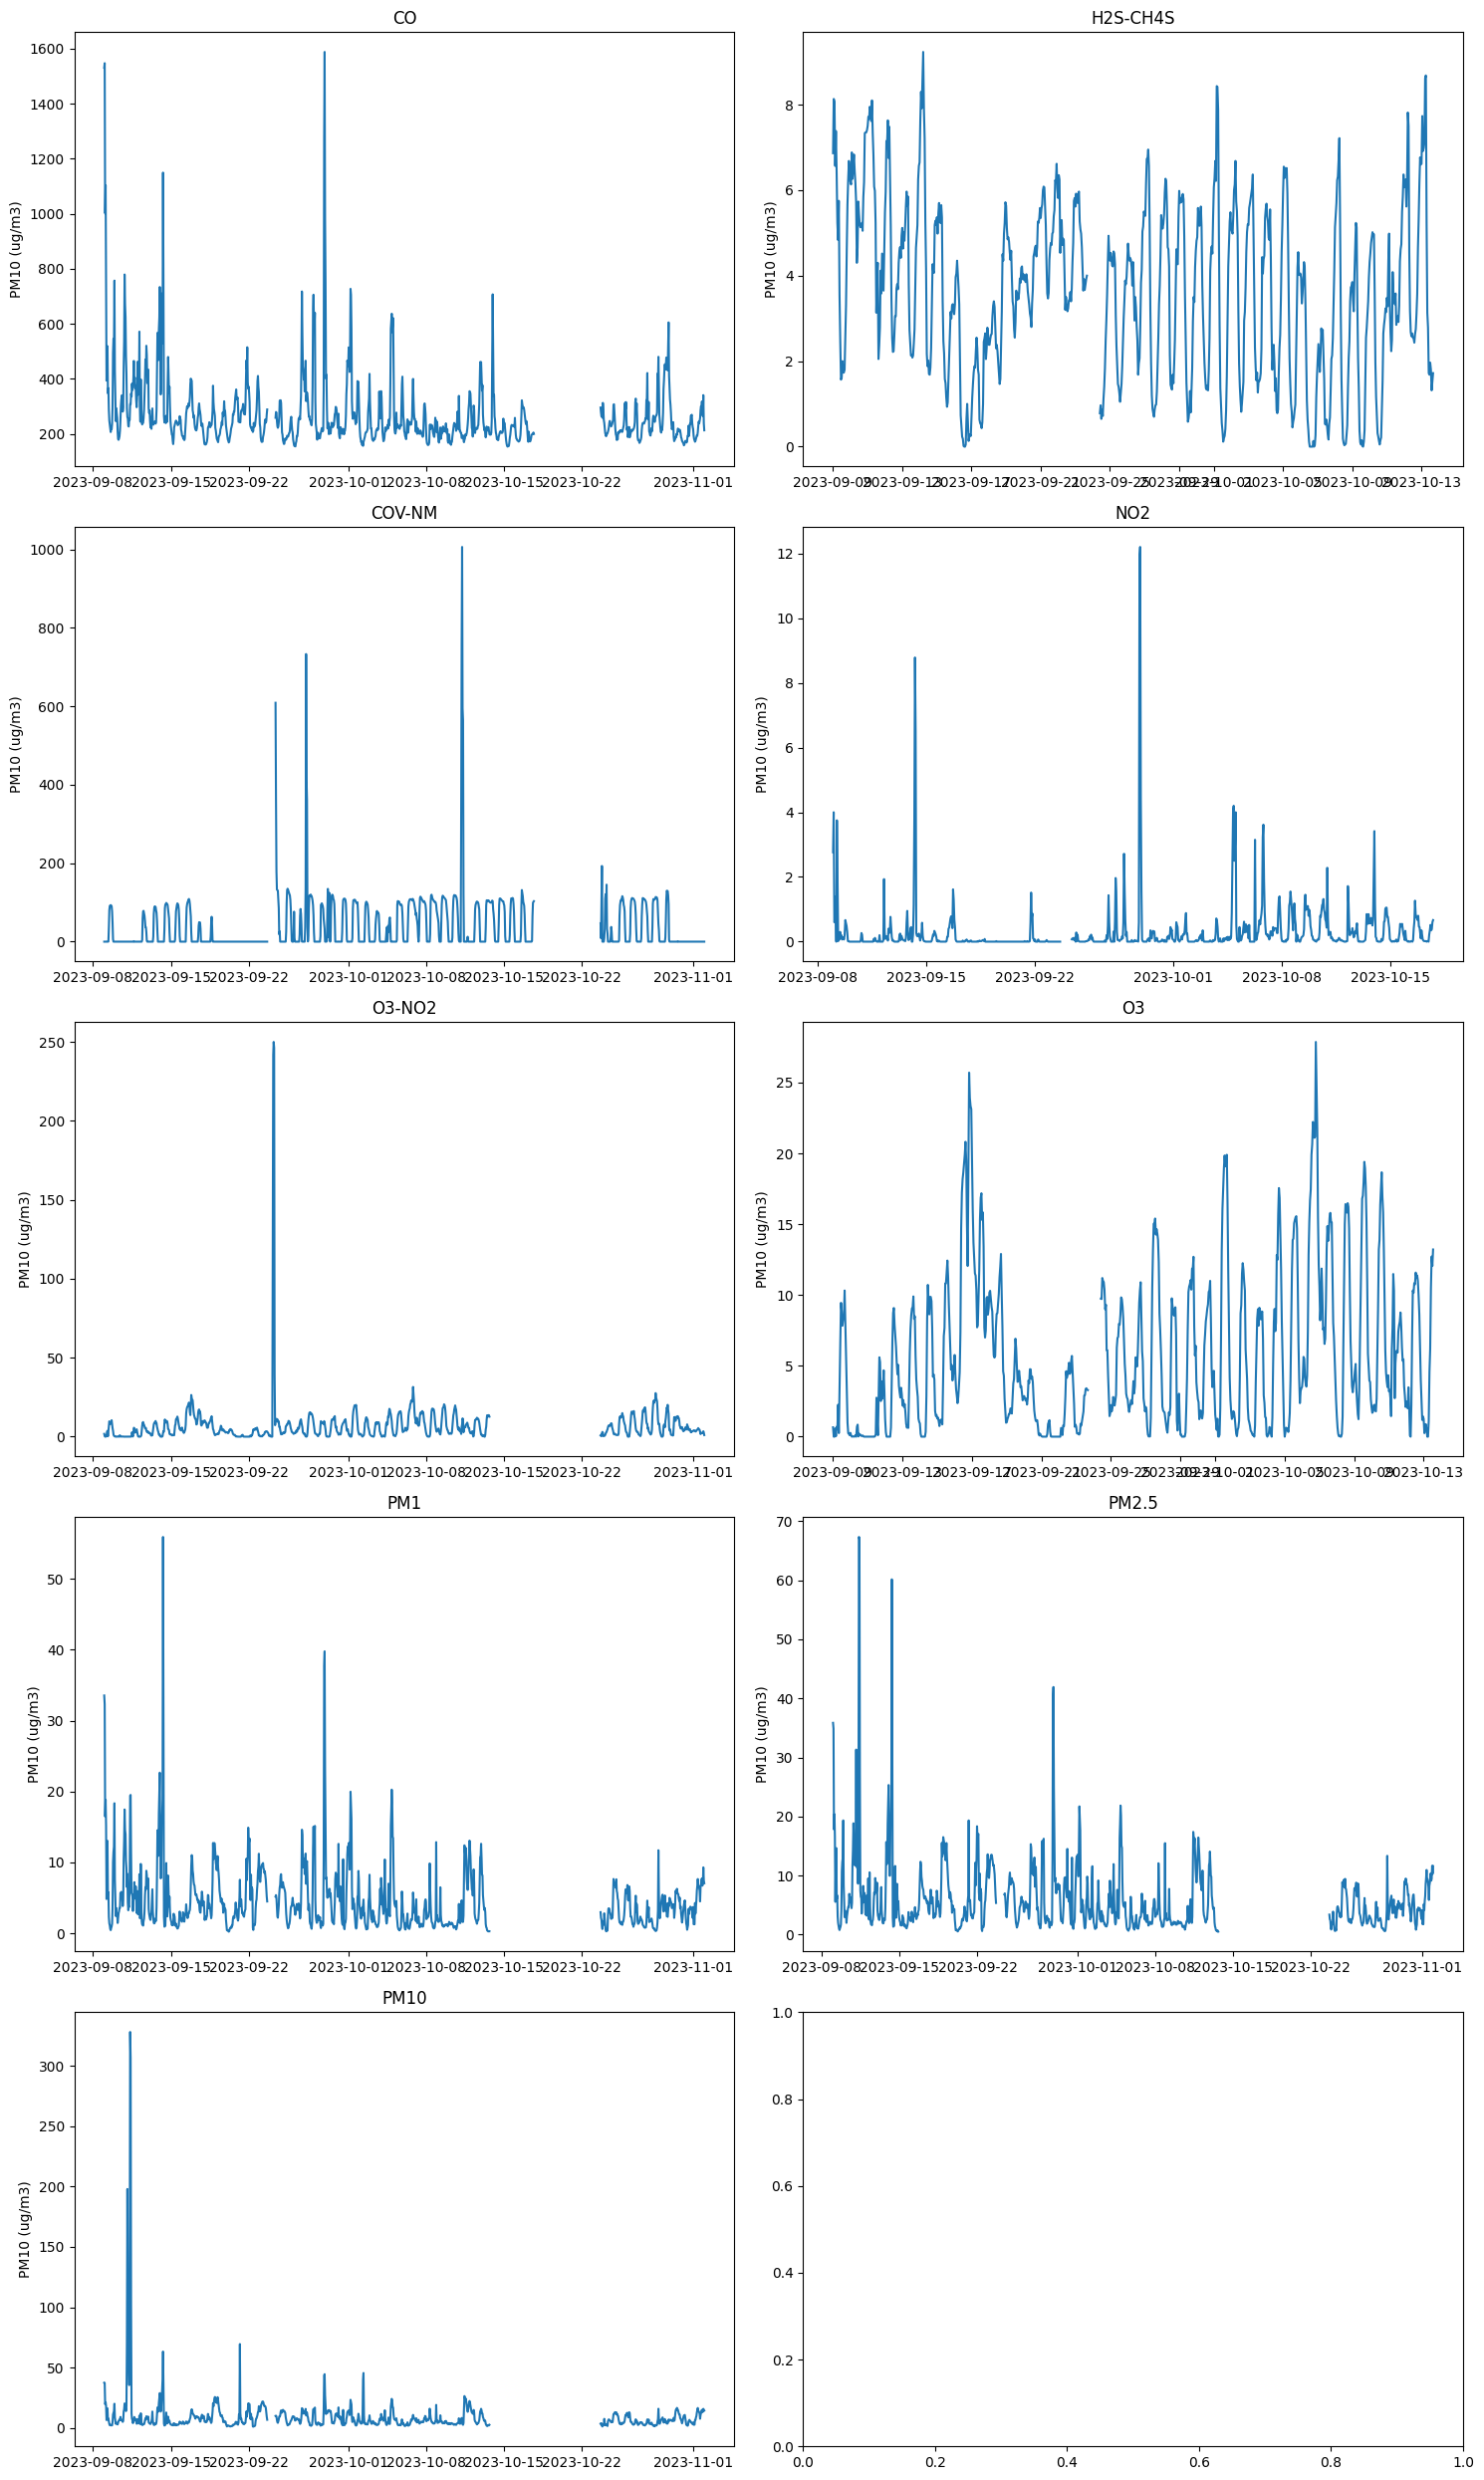

In [ ]:
# Obtener el número de columnas en el DataFrame
num_columns = len(datosEC_hora.columns)

# Calcular el número de filas y columnas para los subgráficos
num_rows = num_columns // 2
if num_columns % 2 != 0:
    num_rows += 1

# Crear los subgráficos
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Iterar sobre cada columna y crear un subgráfico para cada una
for i, column in enumerate(datosEC_hora.columns):
    row = i // 2
    col = i % 2
    axs[row, col].plot(datosEC_hora.index, datosEC_hora[column])
    axs[row, col].set_title(column)
    axs[row, col].set_ylabel('PM10 (ug/m3)')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()
plt.show()